In [491]:
import pandas as pd
import numpy as np

In [492]:
car_data=pd.read_csv('D:/ML_practice/Cars_LinearReg/cars_dataset.csv')

In [493]:
car_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [494]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [495]:
car_data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [496]:
data_y=car_data['price']

In [497]:
data_y.head()

0    12500
1    16500
2    11000
3    16800
4    17300
Name: price, dtype: int64

In [498]:
data_x=car_data.drop('price',axis=1)

In [499]:
data_x.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [500]:
data_x.groupby(['Make']).count()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
Make,,,,,,,,
BMW,10781,10781,10781,10781,10781,10781,10781,10781
Ford,17964,17964,17964,17964,17964,17964,17964,17964
Hyundai,4860,4860,4860,4860,4860,4860,4860,4860
audi,10668,10668,10668,10668,10668,10668,10668,10668
skoda,6267,6267,6267,6267,6267,6267,6267,6267
toyota,6738,6738,6738,6738,6738,6738,6738,6738
vw,15157,15157,15157,15157,15157,15157,15157,15157


In [501]:


###dropping columns

##as each model has same transmission,fuelType

In [502]:
data_x['model'].value_counts().index[:10]

Index([' Fiesta', ' Golf', ' Focus', ' Polo', ' 3 Series', ' Kuga', ' Yaris',
       ' 1 Series', ' Aygo', ' A3'],
      dtype='object')

In [503]:
data_x['model'].value_counts().sort_values(ascending=False).head(25)

 Fiesta      6556
 Golf        4863
 Focus       4588
 Polo        3287
 3 Series    2443
 Kuga        2225
 Yaris       2122
 1 Series    1969
 Aygo        1961
 A3          1929
 Tiguan      1765
 Fabia       1571
 Octavia     1477
 Q3          1417
 A4          1381
 A1          1347
 Tucson      1300
 2 Series    1229
 EcoSport    1143
 I10         1092
 5 Series    1056
 4 Series     995
 Passat       915
 Up           884
 A5           882
Name: model, dtype: int64

In [504]:
len(data_x['model'].unique())

146

In [505]:
for feature in data_x.columns[:]:
    print(feature,":",len(data_x[feature].unique()), "lables")

model : 146 lables
year : 25 lables
transmission : 4 lables
mileage : 35743 lables
fuelType : 5 lables
tax : 47 lables
mpg : 177 lables
engineSize : 32 lables
Make : 7 lables


In [506]:
data_x.tail()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make
72430,I30,2016,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai
72434,Tucson,2016,Automatic,11472,Diesel,125.0,57.6,1.7,Hyundai


In [507]:
model_top_80=[x for x in data_x.model.value_counts().sort_values(ascending=False).head(120).index]
model_top_80

[' Fiesta',
 ' Golf',
 ' Focus',
 ' Polo',
 ' 3 Series',
 ' Kuga',
 ' Yaris',
 ' 1 Series',
 ' Aygo',
 ' A3',
 ' Tiguan',
 ' Fabia',
 ' Octavia',
 ' Q3',
 ' A4',
 ' A1',
 ' Tucson',
 ' 2 Series',
 ' EcoSport',
 ' I10',
 ' 5 Series',
 ' 4 Series',
 ' Passat',
 ' Up',
 ' A5',
 ' Q5',
 ' Q2',
 ' X1',
 ' Superb',
 ' A6',
 ' T-Roc',
 ' Auris',
 ' X3',
 ' C-MAX',
 ' I30',
 ' Ka+',
 ' Mondeo',
 ' I20',
 ' C-HR',
 ' RAV4',
 ' Kodiaq',
 ' Citigo',
 ' X5',
 ' Yeti Outdoor',
 ' Q7',
 ' Karoq',
 ' Touareg',
 ' B-MAX',
 ' Touran',
 ' TT',
 ' Kona',
 ' T-Cross',
 ' S-MAX',
 ' X2',
 ' Ioniq',
 ' Golf SV',
 ' Corolla',
 ' Sharan',
 ' Arteon',
 ' Grand C-MAX',
 ' Santa Fe',
 ' Scirocco',
 ' Prius',
 ' Galaxy',
 ' Edge',
 ' IX20',
 ' KA',
 ' Scala',
 ' X4',
 ' Rapid',
 ' Kamiq',
 ' Yeti',
 ' I40',
 ' M4',
 ' A7',
 ' A8',
 ' IX35',
 ' I800',
 ' Avensis',
 ' Verso',
 ' Amarok',
 ' 6 Series',
 ' Z4',
 ' 7 Series',
 ' X6',
 ' Caravelle',
 ' CC',
 ' Tiguan Allspace',
 ' Hilux',
 ' Beetle',
 ' Puma',
 ' GT86'

In [508]:
##applying KDD encoding##

def kdd_one_hot(data,variable,lables):
    for label in lables:
        data[variable+'_'+label]=np.where(data[variable]==label,1,0)
kdd_one_hot(data_x,'model',model_top_80)

In [509]:
data_x.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make,model_ Fiesta,...,model_ M3,model_ M2,model_ S3,model_ i8,model_ Roomster,model_ Fusion,model_ SQ5,model_ PROACE VERSO,model_ California,model_ Supra
0,A1,2017,Manual,15735,Petrol,150.0,55.4,1.4,audi,0,...,0,0,0,0,0,0,0,0,0,0
1,A6,2016,Automatic,36203,Diesel,20.0,64.2,2.0,audi,0,...,0,0,0,0,0,0,0,0,0,0
2,A1,2016,Manual,29946,Petrol,30.0,55.4,1.4,audi,0,...,0,0,0,0,0,0,0,0,0,0
3,A4,2017,Automatic,25952,Diesel,145.0,67.3,2.0,audi,0,...,0,0,0,0,0,0,0,0,0,0
4,A3,2019,Manual,1998,Petrol,145.0,49.6,1.0,audi,0,...,0,0,0,0,0,0,0,0,0,0


In [510]:
data_x.transmission.value_counts().index

Index(['Manual', 'Semi-Auto', 'Automatic', 'Other'], dtype='object')

In [511]:
kdd_one_hot(data_x,'transmission',data_x.transmission.value_counts().index)

In [512]:
data_x.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make,model_ Fiesta,...,model_ Roomster,model_ Fusion,model_ SQ5,model_ PROACE VERSO,model_ California,model_ Supra,transmission_Manual,transmission_Semi-Auto,transmission_Automatic,transmission_Other
0,A1,2017,Manual,15735,Petrol,150.0,55.4,1.4,audi,0,...,0,0,0,0,0,0,1,0,0,0
1,A6,2016,Automatic,36203,Diesel,20.0,64.2,2.0,audi,0,...,0,0,0,0,0,0,0,0,1,0
2,A1,2016,Manual,29946,Petrol,30.0,55.4,1.4,audi,0,...,0,0,0,0,0,0,1,0,0,0
3,A4,2017,Automatic,25952,Diesel,145.0,67.3,2.0,audi,0,...,0,0,0,0,0,0,0,0,1,0
4,A3,2019,Manual,1998,Petrol,145.0,49.6,1.0,audi,0,...,0,0,0,0,0,0,1,0,0,0


In [513]:
kdd_one_hot(data_x,'fuelType',data_x.fuelType.value_counts().index)
data_x.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make,model_ Fiesta,...,model_ Supra,transmission_Manual,transmission_Semi-Auto,transmission_Automatic,transmission_Other,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Electric
0,A1,2017,Manual,15735,Petrol,150.0,55.4,1.4,audi,0,...,0,1,0,0,0,1,0,0,0,0
1,A6,2016,Automatic,36203,Diesel,20.0,64.2,2.0,audi,0,...,0,0,0,1,0,0,1,0,0,0
2,A1,2016,Manual,29946,Petrol,30.0,55.4,1.4,audi,0,...,0,1,0,0,0,1,0,0,0,0
3,A4,2017,Automatic,25952,Diesel,145.0,67.3,2.0,audi,0,...,0,0,0,1,0,0,1,0,0,0
4,A3,2019,Manual,1998,Petrol,145.0,49.6,1.0,audi,0,...,0,1,0,0,0,1,0,0,0,0


In [514]:
kdd_one_hot(data_x,'Make',data_x.Make.value_counts().index)
data_x.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make,model_ Fiesta,...,fuelType_Hybrid,fuelType_Other,fuelType_Electric,Make_Ford,Make_vw,Make_BMW,Make_audi,Make_toyota,Make_skoda,Make_Hyundai
0,A1,2017,Manual,15735,Petrol,150.0,55.4,1.4,audi,0,...,0,0,0,0,0,0,1,0,0,0
1,A6,2016,Automatic,36203,Diesel,20.0,64.2,2.0,audi,0,...,0,0,0,0,0,0,1,0,0,0
2,A1,2016,Manual,29946,Petrol,30.0,55.4,1.4,audi,0,...,0,0,0,0,0,0,1,0,0,0
3,A4,2017,Automatic,25952,Diesel,145.0,67.3,2.0,audi,0,...,0,0,0,0,0,0,1,0,0,0
4,A3,2019,Manual,1998,Petrol,145.0,49.6,1.0,audi,0,...,0,0,0,0,0,0,1,0,0,0


In [515]:
data_x=data_x.drop(['model','transmission','fuelType','Make'],axis=1)

In [516]:
data_x.head()

,year,mileage,tax,mpg,engineSize,model_ Fiesta,model_ Golf,model_ Focus,model_ Polo,model_ 3 Series,...,fuelType_Hybrid,fuelType_Other,fuelType_Electric,Make_Ford,Make_vw,Make_BMW,Make_audi,Make_toyota,Make_skoda,Make_Hyundai
0,2017,15735,150.0,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2016,36203,20.0,64.2,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2016,29946,30.0,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2017,25952,145.0,67.3,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2019,1998,145.0,49.6,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [517]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Columns: 141 entries, year to Make_Hyundai
dtypes: float64(3), int32(136), int64(2)
memory usage: 40.3 MB


<AxesSubplot:>

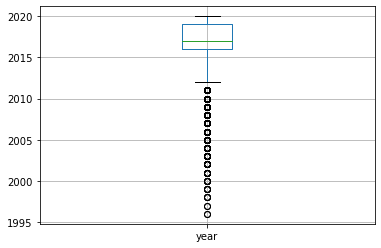

In [518]:
import matplotlib.pyplot as plt
data_x.boxplot(column=['year'])

In [519]:
data_x['year'].describe()

count    72435.000000
mean      2017.073666
std          2.101252
min       1996.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64

In [520]:
###removing outliers

##for year

upper_boundary=int(data_x['year'].mean()+3*data_x['year'].std())
lower_boundary=int(data_x['year'].mean()-3*data_x['year'].std())
print(lower_boundary,upper_boundary)

2010 2023


In [521]:
##EXTREME Outliers
IQR=data_x.year.quantile(0.75)-data_x.year.quantile(0.25)
lower_bridge=int(data_x['year'].quantile(0.25)-(IQR*3))
upper_bridge=int(data_x['year'].quantile(0.75)+(IQR*3))
print(lower_bridge,upper_bridge)

2007 2028


<AxesSubplot:>

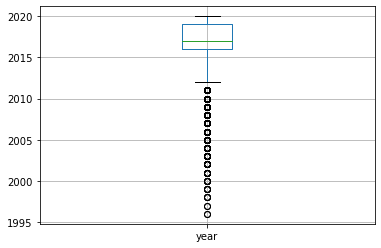

In [522]:
import matplotlib.pyplot as plt
data_x.boxplot(column=['year'])

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

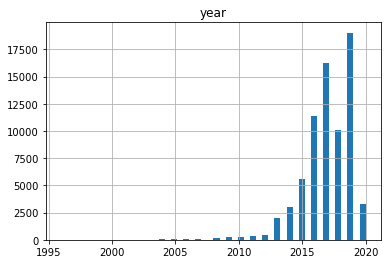

In [523]:
car_data.hist('year',bins=50)

In [524]:
##removing mileage outliers

data_x['mileage'].describe()

count     72435.000000
mean      23176.517057
std       21331.515562
min           1.000000
25%        7202.500000
50%       17531.000000
75%       32449.000000
max      323000.000000
Name: mileage, dtype: float64

<AxesSubplot:>

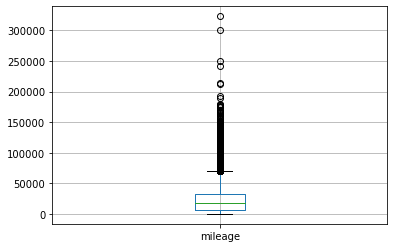

In [525]:
import matplotlib.pyplot as plt
data_x.boxplot(column=['mileage'])

array([[<AxesSubplot:title={'center':'mileage'}>]], dtype=object)

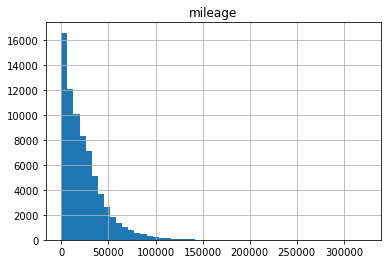

In [526]:
car_data.hist('mileage',bins=50)

In [527]:
upper_boundary_mileage=int(data_x['mileage'].mean()+3*data_x['mileage'].std())
lower_boundary_mileage=int(data_x['mileage'].mean()-3*data_x['mileage'].std())
print(lower_boundary_mileage,upper_boundary_mileage)

-40818 87171


In [528]:
##EXTREME Outliers mileage
IQR_mileage=data_x.mileage.quantile(0.75)-data_x.mileage.quantile(0.25)
lower_bridge_mileage=int(data_x['mileage'].quantile(0.25)-(IQR_mileage*3))
upper_bridge_mileage=int(data_x['mileage'].quantile(0.75)+(IQR_mileage*3))
print(lower_bridge_mileage,upper_bridge_mileage)

-68537 108188


In [529]:
data_x.loc[data_x['mileage']<=lower_bridge_mileage,'mileage']=lower_bridge_mileage
data_x.loc[data_x['mileage']>=upper_bridge_mileage,'mileage']=upper_bridge_mileage

<AxesSubplot:>

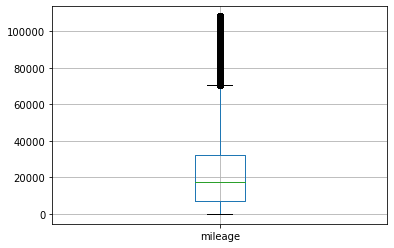

In [530]:
import matplotlib.pyplot as plt
data_x.boxplot(column=['mileage'])

In [531]:
##removing tax outliers

data_x['tax'].describe()

count    72435.000000
mean       116.953407
std         64.045533
min          0.000000
25%         30.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

array([[<AxesSubplot:title={'center':'tax'}>]], dtype=object)

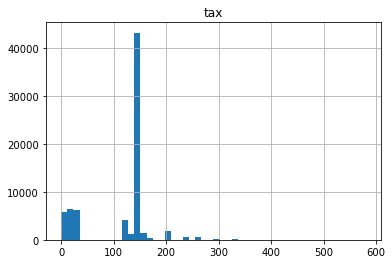

In [532]:
data_x.hist('tax', bins=50)

<AxesSubplot:>

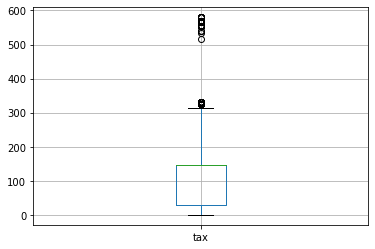

In [533]:
data_x.boxplot(column=['tax'])

In [534]:
upper_boundary_tax=int(data_x['tax'].mean()+3*data_x['tax'].std())
lower_boundary_tax=int(data_x['tax'].mean()-3*data_x['tax'].std())
print(lower_boundary_tax,upper_boundary_tax)

-75 309


In [535]:
##EXTREME Outliers tax
IQR_tax=data_x.tax.quantile(0.75)-data_x.tax.quantile(0.25)
lower_bridge_tax=int(data_x['tax'].quantile(0.25)-(IQR_tax*3))
upper_bridge_tax=int(data_x['tax'].quantile(0.75)+(IQR_tax*3))
print(lower_bridge_tax,upper_bridge_tax)

-315 490


In [536]:
data_x.loc[data_x['tax']<=lower_bridge_tax,'tax']=lower_bridge_tax
data_x.loc[data_x['tax']>=upper_bridge_tax,'tax']=upper_bridge_tax

<AxesSubplot:>

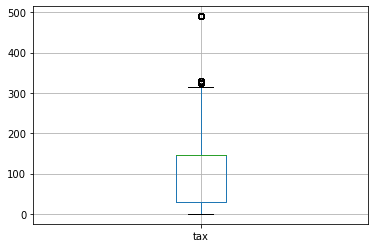

In [537]:
data_x.boxplot('tax')

In [538]:
data_x.tax.describe()
data_x.tax.value_counts().sort_values(ascending=False).head(20)

145.0    34376
150.0     8525
20.0      6399
30.0      6182
0.0       5762
125.0     4117
160.0     1465
200.0     1412
135.0     1180
235.0      494
165.0      478
205.0      409
260.0      399
140.0      325
300.0      227
240.0      132
265.0      129
325.0      118
490.0      103
305.0       53
Name: tax, dtype: int64

In [539]:
###removing outliers MPG

data_x['mpg'].describe()

count    72435.000000
mean        55.852480
std         17.114391
min          0.300000
25%         47.900000
50%         55.400000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64

array([[<AxesSubplot:title={'center':'mpg'}>]], dtype=object)

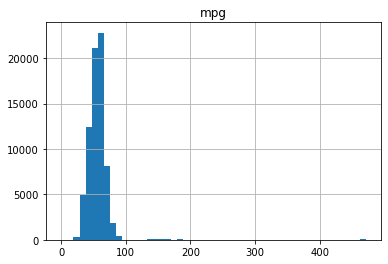

In [540]:
data_x.hist('mpg',bins=50)

<AxesSubplot:>

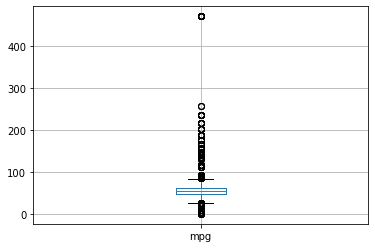

In [541]:
data_x.boxplot('mpg')

In [542]:
upper_boundary_mpg=int(data_x['mpg'].mean()+3*data_x['mpg'].std())
lower_boundary_mpg=int(data_x['mpg'].mean()-3*data_x['mpg'].std())
print(lower_boundary_mpg,upper_boundary_mpg)

4 107


In [543]:
##EXTREME Outliers tax
IQR_mpg=data_x.mpg.quantile(0.75)-data_x.mpg.quantile(0.25)
lower_bridge_mpg=int(data_x['mpg'].quantile(0.25)-(IQR_mpg*3))
upper_bridge_mpg=int(data_x['mpg'].quantile(0.75)+(IQR_mpg*3))
print(lower_bridge_mpg,upper_bridge_mpg)

3 107


In [544]:
data_x.loc[data_x['mpg']<=lower_bridge_mpg,'mpg']=lower_bridge_mpg
data_x.loc[data_x['mpg']>=upper_bridge_mpg,'mpg']=upper_bridge_mpg

<AxesSubplot:>

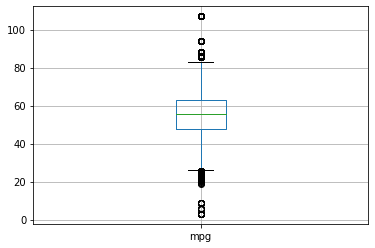

In [545]:
data_x.boxplot('mpg')

In [546]:
###removing outliers engineSize

data_x['engineSize'].describe()

count    72435.000000
mean         1.635650
std          0.561535
min          0.000000
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64

array([[<AxesSubplot:title={'center':'engineSize'}>]], dtype=object)

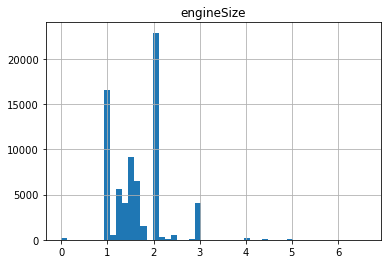

In [547]:
data_x.hist('engineSize', bins=50)

<AxesSubplot:>

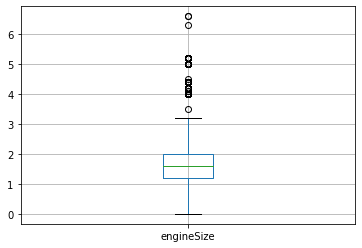

In [548]:
data_x.boxplot('engineSize')

In [549]:
upper_boundary_engineSize=int(data_x['engineSize'].mean()+3*data_x['engineSize'].std())
lower_boundary_engineSize=int(data_x['engineSize'].mean()-3*data_x['engineSize'].std())
print(lower_boundary_engineSize,upper_boundary_engineSize)

0 3


In [550]:
##EXTREME Outliers tax
IQR_engineSize=data_x.engineSize.quantile(0.75)-data_x.engineSize.quantile(0.25)
lower_bridge_engineSize=int(data_x['engineSize'].quantile(0.25)-(IQR_engineSize*3))
upper_bridge_engineSize=int(data_x['engineSize'].quantile(0.75)+(IQR_engineSize*3))
print(lower_bridge_engineSize,upper_bridge_engineSize)

-1 4


In [551]:
data_x.loc[data_x['engineSize']<=lower_bridge_engineSize,'engineSize']=lower_bridge_engineSize
data_x.loc[data_x['engineSize']>=upper_bridge_engineSize,'engineSize']=upper_bridge_engineSize

<AxesSubplot:>

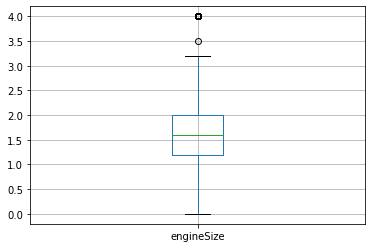

In [552]:
data_x.boxplot('engineSize')

In [553]:
###Linear Regression###

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict

In [554]:
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.22, random_state=42)
regr = LinearRegression().fit(x_train,y_train)
price_prediction = regr.predict(x_test)

In [555]:
from sklearn.metrics import mean_squared_error, r2_score
#R2 coefficient, MAE and MSE measures
print('Test split evaluation \n',
      'Coefficient of determination R2: %.3f \n' % r2_score(y_test, price_prediction),
      'Mean Absolute Error: %.2f \n' % (sum(abs(y_test - price_prediction)) / len(y_test)),    
      'Mean Square Error: %.2f' % mean_squared_error(y_test, price_prediction))

Test split evaluation 
 Coefficient of determination R2: 0.888 
 Mean Absolute Error: 2025.66 
 Mean Square Error: 9965319.96


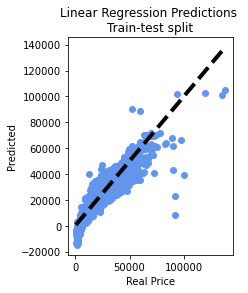

In [556]:
#Predictions plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

def plot_regression(real, predicted, color, title):
  plt.scatter(real, predicted, color=color)
  plt.plot([real.min(), real.max()], [real.min(), real.max()], 'k--', lw=4)
  plt.xlabel('Real Price')
  plt.ylabel('Predicted')
  plt.title(title)


#Real price vs train-test predictions plot (without outliers)
plt.subplot(131)
plot_regression(y_test, price_prediction, 'cornflowerblue', 'Linear Regression Predictions \nTrain-test split')
plt.show()

In [557]:
from sklearn.metrics import r2_score
r2_score(y_test,price_prediction)

0.8878933133249473

In [558]:
regr.score(x_test,y_test)

0.8878933133249473

In [559]:
regr.intercept_

-2690293.3612551014

In [560]:
regr.coef_

array([ 1.34830880e+03, -8.96851326e-02, -1.32754034e+01, -1.51637936e+02,
        3.82878584e+03, -9.69869236e+03, -6.13838598e+02, -7.93344319e+03,
       -3.27659733e+03, -1.00146454e+04, -8.28592296e+03, -3.80826543e+03,
       -1.25010847e+04, -3.30976205e+03, -1.07843297e+04,  1.89942554e+03,
       -2.97358356e+03, -1.04771362e+03, -8.22526373e+03, -9.95239163e+03,
       -1.26040528e+04, -6.28521733e+03, -1.18903927e+04, -9.76710950e+03,
       -1.01004623e+04, -7.94454776e+03, -9.57706653e+03, -2.32227626e+02,
       -5.62251306e+03, -8.39377157e+03, -3.40580233e+03, -9.76569488e+03,
       -9.91053365e+03,  1.41296091e+03, -7.82437902e+03,  1.45697337e+03,
       -2.74798020e+03, -4.36022242e+03, -1.02747351e+04, -6.83690637e+03,
       -1.45229345e+04, -8.32907498e+03, -9.29297562e+03,  1.36113280e+03,
        2.88255618e+02,  5.02135442e+03, -3.74230417e+03,  3.75279926e+03,
       -1.05993030e+03,  6.33069391e+03,  2.24668355e+03,  7.24156150e+03,
       -1.13869026e+04,  